# 导入所需要的包

In [673]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
import warnings
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D
from keras.utils import to_categorical
import numpy as np
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
warnings.simplefilter('ignore')

# 处理数据

digits

In [674]:
digits = datasets.load_digits()

In [675]:
print(digits.keys())

dict_keys(['images', 'target', 'target_names', 'data', 'DESCR'])


In [676]:
X = digits.data
#标记
Y = digits.target
 
#数据与处理，让特征值都处在0-1之间
X -= X.min()
X /= X.max()

In [677]:
Y = np.array(Y)
Y_ = to_categorical(Y)

In [678]:
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, Y_, test_size=0.2, random_state=1)

In [679]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [680]:
X_train.shape

(1437, 64)

# model

In [681]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D
from keras.optimizers import RMSprop

DNN

In [682]:
DNN = Sequential()
DNN.add(Dense(512, activation='relu', input_shape=(64,)))
DNN.add(Dropout(0.2))
DNN.add(Dense(10, activation='softmax'))
DNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 512)               33280     
_________________________________________________________________
dropout_66 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_105 (Dense)            (None, 10)                5130      
Total params: 38,410
Trainable params: 38,410
Non-trainable params: 0
_________________________________________________________________


In [683]:
DNN.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [684]:
history = DNN.fit(X_train,y_train,batch_size=100,epochs=20)

Epoch 1/20
1437/1437 [==============================] - 3s 2ms/step - loss: 1.7594 - acc: 0.6270
Epoch 2/20
1437/1437 [==============================] - 0s 83us/step - loss: 1.0546 - acc: 0.8643
Epoch 3/20
1437/1437 [==============================] - 0s 67us/step - loss: 0.6839 - acc: 0.9109
Epoch 4/20
1437/1437 [==============================] - 0s 94us/step - loss: 0.4839 - acc: 0.9158
Epoch 5/20
1437/1437 [==============================] - 0s 66us/step - loss: 0.3738 - acc: 0.9346
Epoch 6/20
1437/1437 [==============================] - 0s 70us/step - loss: 0.3080 - acc: 0.9408
Epoch 7/20
1437/1437 [==============================] - 0s 72us/step - loss: 0.2551 - acc: 0.9450
Epoch 8/20
1437/1437 [==============================] - 0s 74us/step - loss: 0.2219 - acc: 0.9548
Epoch 9/20
1437/1437 [==============================] - 0s 64us/step - loss: 0.1925 - acc: 0.9589
Epoch 10/20
1437/1437 [==============================] - 0s 95us/step - loss: 0.1766 - acc: 0.9576
Epoch 11/20
1437/143

In [685]:
y_pred_dnn_ = DNN.predict(X_test) 
y_pred_dnn = DNN.predict_classes(X_test)

In [686]:
y_true = []
for i in y_test:
    y_true.append(i.argmax())

CNN

In [710]:
X = digits.data
#标记
Y = digits.target
 
#数据与处理，让特征值都处在0-1之间
X -= X.min()
X /= X.max()

In [711]:
X = X.reshape(X.shape[0],8,8,1)
Y = np.array(Y)
Y_ = to_categorical(Y)
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, Y_, test_size=0.2, random_state=1)

In [689]:
CNN = Sequential()
CNN.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(8,8,1))) # 32个过滤器，过滤器大小是3×3，32×26×26
CNN.add(Conv2D(64, (3, 3), activation='relu')) #64×24×24
CNN.add(MaxPooling2D(pool_size=(2, 2)))# 向下取样
CNN.add(Dropout(0.25))
CNN.add(Flatten()) #降维：将64×12×12降为1维（即把他们相乘起来）
CNN.add(Dense(128, activation='relu'))
CNN.add(Dropout(0.5))
CNN.add(Dense(10, activation='softmax')) #全连接2层
CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 6, 6, 32)          320       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_67 (Dropout)         (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_106 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_68 (Dropout)         (None, 128)               0         
__________

In [690]:
CNN.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [691]:
history = CNN.fit(X_train,y_train,batch_size=100,epochs=20)

Epoch 1/20
1437/1437 [==============================] - 3s 2ms/step - loss: 2.0873 - acc: 0.3138
Epoch 2/20
1437/1437 [==============================] - 0s 244us/step - loss: 1.3968 - acc: 0.5929
Epoch 3/20
1437/1437 [==============================] - ETA: 0s - loss: 0.9990 - acc: 0.7036- ETA: 0s - loss: 1.0431 - acc: 0. - 0s 275us/step - loss: 0.9893 - acc: 0.7077
Epoch 4/20
1437/1437 [==============================] - 0s 257us/step - loss: 0.7497 - acc: 0.7752
Epoch 5/20
1437/1437 [==============================] - 0s 223us/step - loss: 0.6139 - acc: 0.8135
Epoch 6/20
1437/1437 [==============================] - 0s 204us/step - loss: 0.4926 - acc: 0.8566
Epoch 7/20
1437/1437 [==============================] - 0s 217us/step - loss: 0.4133 - acc: 0.8789
Epoch 8/20
1437/1437 [==============================] - 0s 214us/step - loss: 0.3604 - acc: 0.8977
Epoch 9/20
1437/1437 [==============================] - 0s 241us/step - loss: 0.3053 - acc: 0.9137
Epoch 10/20
1437/1437 [===============

In [692]:
y_pred_cnn_ = CNN.predict(X_test)
y_pred_cnn = CNN.predict_classes(X_test)
y_pred_cnn

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       5, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 5, 2,
       3, 2, 8, 1, 1, 9, 6, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 8, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 7, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 7, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 5, 7, 9, 8, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 4, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 2, 0, 5,

In [693]:
y_true = []
for i in y_test:
    y_true.append(i.argmax())
y_true = np.array(y_true)

In [694]:
print(y_true.shape)
print(y_pred_cnn.shape)
print(y_pred_dnn.shape)

(360,)
(360,)
(360,)


混淆矩阵

In [695]:
matrix_dnn = np.random.rand(10,10)
for i in range(10):
    for j in range(10):
        matrix_dnn[i][j] = 0
matrix_dnn

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [696]:
for i in range(len(y_true)):
    matrix_dnn[y_true[i]][y_pred_dnn[i]]+=1

In [697]:
matrix_dnn

array([[42.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 36.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 40.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 38.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 32.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 37.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 37.,  0.,  0.],
       [ 0.,  2.,  1.,  1.,  0.,  0.,  0.,  0., 24.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 34.]])

In [698]:
matrix_cnn = np.random.rand(10,10)
for i in range(10):
    for j in range(10):
        matrix_cnn[i][j] = 0
matrix_cnn

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [699]:
for i in range(len(y_true)):
    matrix_cnn[y_true[i]][y_pred_cnn[i]]+=1

In [700]:
matrix_cnn

array([[42.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 33.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  0., 36.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 39.,  0.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0., 38.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 31.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 37.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0., 36.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  1., 25.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., 33.]])

ROC曲线

In [717]:
y_pred_dnn_ = y_pred_dnn_[:50]
y_pred_dnn_.shape

(50, 10)

In [718]:
y_test = y_test[:50]
y_test.shape

(50, 10)

In [719]:
y_pred_cnn_ = y_pred_cnn_[:50]
y_pred_cnn_.shape

(50, 10)

In [720]:
y_test.shape

(50, 10)

In [721]:
y_test = y_test.astype(int)

In [722]:
y_pred_dnn_[:,0]

array([1.01093929e-06, 6.90127172e-06, 9.99910831e-01, 3.69061439e-08,
       2.31957486e-07, 9.98510778e-01, 6.62149722e-03, 1.37715901e-07,
       2.33848345e-06, 6.95328663e-06, 7.03298952e-04, 1.86784934e-08,
       2.03781565e-06, 2.88397769e-06, 4.76350851e-06, 1.23388918e-05,
       2.20165766e-05, 1.70321179e-08, 9.23273689e-08, 1.31746208e-06,
       1.23046263e-07, 1.26850055e-05, 1.18152975e-05, 2.88768322e-04,
       9.97153521e-01, 2.27924229e-05, 1.21916682e-05, 2.09842469e-07,
       6.40705402e-05, 4.28444565e-07, 2.83996487e-05, 2.51154113e-03,
       2.05521792e-05, 1.24342506e-07, 1.27699892e-10, 6.38387937e-05,
       7.17638250e-06, 2.39921320e-07, 5.68293892e-08, 9.96924818e-01,
       1.65466390e-05, 6.68760098e-04, 9.99022603e-01, 9.99905229e-01,
       6.02839646e-06, 8.88345486e-09, 1.40526313e-09, 5.05899642e-08,
       3.28874012e-06, 2.16633475e-06], dtype=float32)

In [727]:
y_test

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0,

No handles with labels found to put in legend.


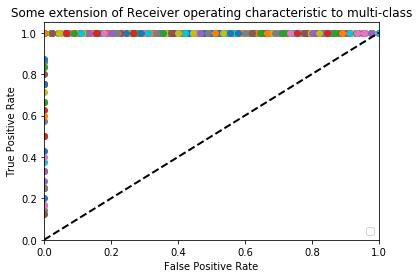

In [732]:
plt.figure()
for k in range(10):
    true = 0
    false = 0
    for i in y_test[:,k]:
        if i==0:
            false+=1
        else:
            true+=1
 
    # 以序号为i为阈值
    for i in range(len(y_pred_dnn_[:,k])):
        tp = 0
        fp = 0

        # 判断序号为j为正例或负例
        for j in range(len(y_pred_dnn_[:,k])):
            # 正阳例
            if y_pred_dnn_[:,k][j]>=y_pred_dnn_[:,k][i] and y_test[:,k][j]==1:
                tp += 1
            # 负阳例
            elif y_pred_dnn_[:,k][j]>=y_pred_dnn_[:,k][i] and y_test[:,k][j]==0:
                fp += 1
        plt.scatter(x=fp/false,y=tp/true)
lw = 2
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
plt.show()

demo 

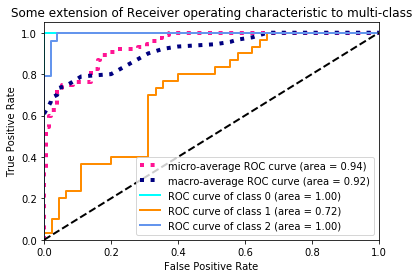

In [708]:
# 引入必要的库
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# 加载数据
iris = datasets.load_iris()
X = iris.data
y = iris.target
# 将标签二值化
y = label_binarize(y, classes=[0, 1, 2])
# 设置种类
n_classes = y.shape[1]

# 训练模型并预测
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()